In [25]:
import json
from collections import defaultdict
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import sys
sys.path.append('../../PhasingFamilies')
sys.path.append('../../PhasingFamilies/phase')
from phase.input_output import PhaseData


In [99]:
#dataset = 'spark'
#ped_file = '../../DATA/spark/sparkfam.ped'

dataset = 'ihart.ms2'
ped_file = '../../DATA/ihart.ms2/ihart.ped'

chrom, start_pos, end_pos = '7', 4101620, 4747462
is_mat = False

#chrom, start_pos, end_pos = '19', 3604269, 3718439
#is_mat = True

In [91]:
phase_data = PhaseData('../../DATA/%s' % dataset)
crossovers, sibpair_keys = [x for x in phase_data.get_filtered_crossovers()]

total crossovers 305086
total sibpairs 2072
phase errors 0
IBD outliers 0
crossover outliers 119
remaining sibpairs 1953
remaining crossovers 271844


In [92]:
sibpairs = phase_data.get_filtered_sibpairs()

total sibpairs 2072
phase errors 0
IBD outliers 0
crossover outliers 119
remaining sibpairs 1953


In [93]:
child_to_phen = dict()
with open(ped_file, 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        fam_id, child_id, f_id, m_id = pieces[0:4]
        phen = pieces[5]
        child_to_phen[child_id] = phen

In [100]:
sibpair_to_crossovers = defaultdict(int)
for c in crossovers:
    if (c['is_mat'] == is_mat) and (c['chrom'] == chrom) and (min(end_pos+100000, c['end_pos'])-max(start_pos-100000, c['start_pos'])>0):
        sibpair_to_crossovers[tuple(sorted(c['child']))] += 1
        

In [101]:
crossover_counts = np.array([sibpair_to_crossovers[tuple(sorted([x['sibling1'], x['sibling2']]))] for x in sibpairs])
na = np.array([int(child_to_phen[x['sibling1']]=='2')+int(child_to_phen[x['sibling2']]=='2') for x in sibpairs])

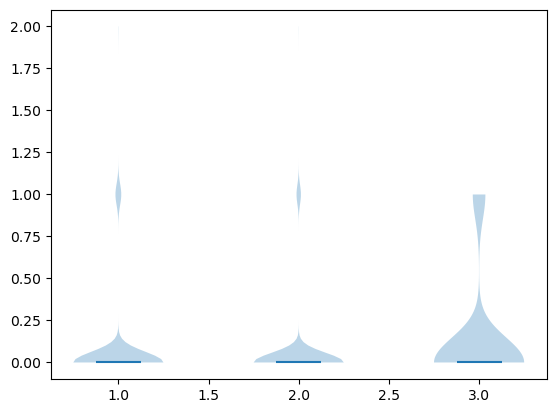

In [102]:
plt.violinplot([crossover_counts[na==2], crossover_counts[na==1], crossover_counts[na==0]], showmedians=True, showextrema=False)
plt.show()

In [103]:
c = [[np.sum(crossover_counts[na==2]>0), np.sum(crossover_counts[na==1]>0), np.sum(crossover_counts[na==0]>0)],
     [np.sum(crossover_counts[na==2]==0), np.sum(crossover_counts[na==1]==0), np.sum(crossover_counts[na==0]==0)]]

print(stats.chi2_contingency(c))

print(c)

Chi2ContingencyResult(statistic=6.409717931730962, pvalue=0.04056462223085147, dof=2, expected_freq=array([[ 60.11623144,  49.58576549,   3.29800307],
       [978.88376856, 807.41423451,  53.70199693]]))
[[65, 41, 7], [974, 816, 50]]


<BarContainer object of 3 artists>

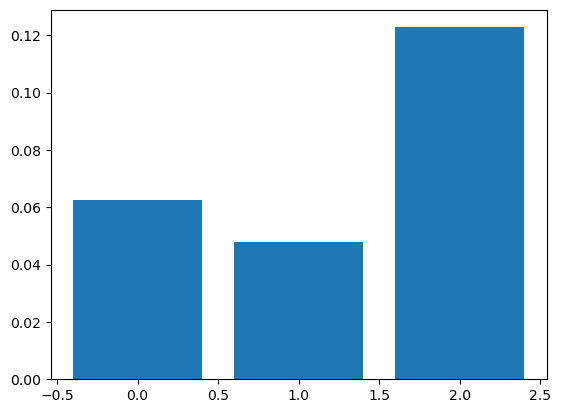

In [104]:
plt.bar(np.arange(3), [np.sum(crossover_counts[na==2]>0)/np.sum(na==2),
          np.sum(crossover_counts[na==1]>0)/np.sum(na==1),
          np.sum(crossover_counts[na==0]>0)/np.sum(na==0),])